<a href="https://colab.research.google.com/github/AyozeGS/IABD/blob/main/SNS/UT3/T2/Ayoze_Gil_Sosa_Act_3_2_Iris_NaiveBayes_Sin_Preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ayoze Gil Sosa

Importación de librerías

In [1]:
# Librerías para tratamiento y visualización de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Librerías para trabajar modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
# Librerías de los modelos a comparar
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

Variables

In [2]:
# Tupla con los modelos a comparar
model_names = ('BernoulliNB', 'CategoricalNB', 'ComplementNB', 'GaussianNB', 'MultinomialNB')
database_name = 'iris'
field_name = "species"

Tratamiento del conjunto de datos

In [3]:
# Importación de datos
df = sns.load_dataset(database_name)
print(df.shape)
df.drop_duplicates(field_name, keep='first')

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [9]:
field_types = df[field_name].unique()
field_types

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
# separamos datos de entrada y salida
X = df.drop(field_name, axis=1)
y = df[field_name]
# separamos train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=1)

In [12]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [6]:

# Función para entrenamiento, predicción y evaluación de un modelo.
def use_model(model_name):
  # Obtenemos la clase a partir de su nombre
  model_class = globals()[model_name]
  # Instanciamos el modelo
  model = model_class()
  # Entrenamos el modelo con los datos de entrenamiento
  model.fit(Xtrain, ytrain)
  # Predicción con nuevos datos
  y_model = model.predict(Xtest)
  # Evaluación y cálculo de la precisión
  accuracy = accuracy_score(ytest, y_model)
  return model, accuracy, y_model

# Llamada a la función de entrenamiento para cada modelo
models = []
for i, model_name in enumerate(model_names):
  models.append(list(use_model(model_name)))

In [7]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None,
                          fig=None,
                          ax=None):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    if not fig:
      fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=titleSup,
           ylabel='True label',
           xlabel='Predicted label')
    ax.annotate(title, xy=(0.5, 1.1), xytext=(0, 10),
            xycoords='axes fraction', textcoords='offset points',
            ha='center', va='baseline', fontsize=10)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    fig.tight_layout()
    fig.suptitle(title, fontsize=16, y=1, ha='center')
    return ax

In [10]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df[field_name].replace(field_types,range(len(field_types)), inplace=True)

def transform_to_categorical_array(y_model):
  # Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
  y_model_df= pd.DataFrame(y_model, columns = [field_name])
  y_model_df[field_name].replace(field_types,range(len(field_types)), inplace=True)
  # Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
  y_model_array = y_model_df[field_name].to_numpy()
  return y_model_array

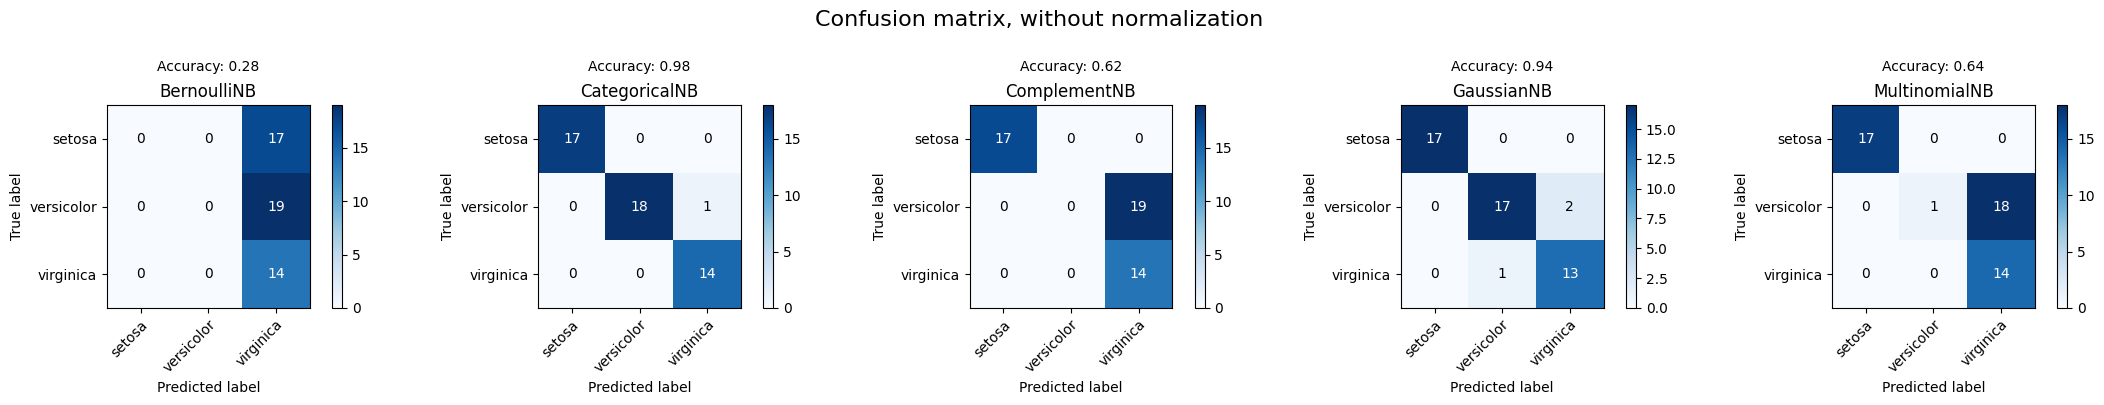

In [8]:
fig, ax = plt.subplots(nrows=1, ncols = 5, figsize = (22,4))
for idx, model in enumerate(models):
  # Creamos este array porque es el parámetro con las clases que espera la función
  model
  classes = np.array(field_types)
  y_model_array = transform_to_categorical_array(models[idx][2])
  plot_confusion_matrix(ytest_df[field_name], y_model_array, classes=classes, normalize=False, title='Accuracy: '+str(model[1]), titleSup=model_names[idx], fig=fig, ax=ax[idx%5])


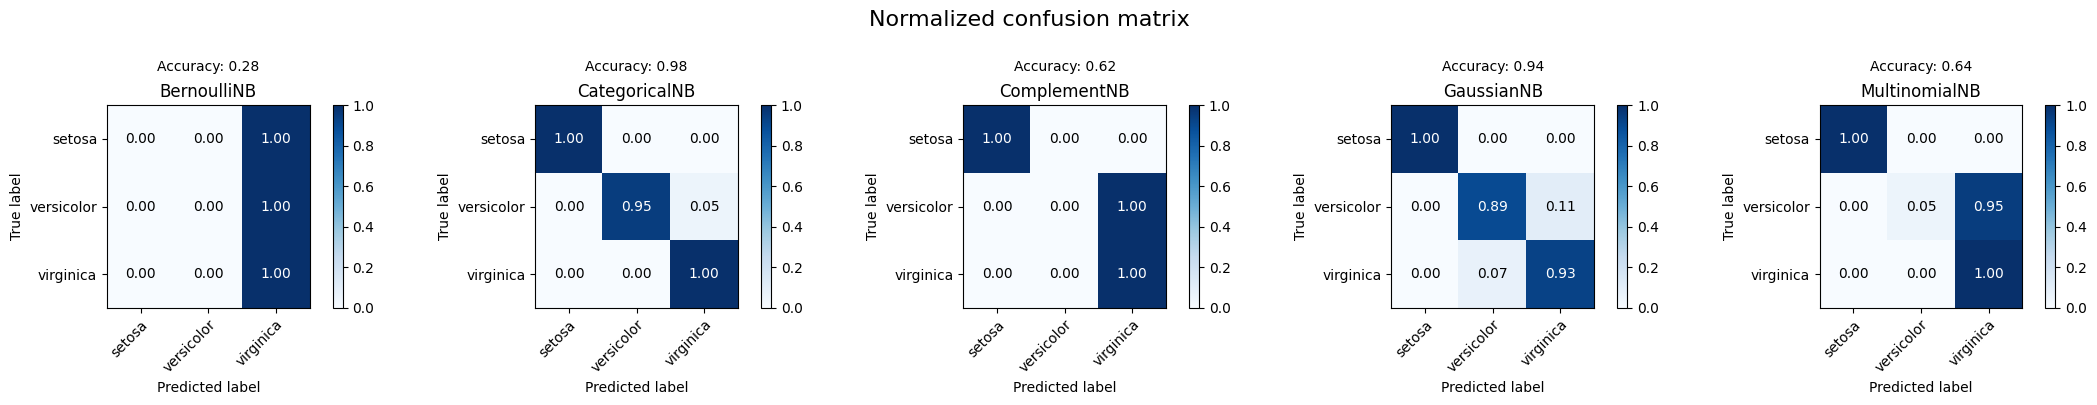

In [11]:
fig, ax = plt.subplots(nrows=1, ncols = 5, figsize = (22,4))
for idx, model in enumerate(models):
  # Creamos este array porque es el parámetro con las clases que espera la función
  model
  classes = np.array(field_types)
  y_model_array = transform_to_categorical_array(models[idx][2])
  plot_confusion_matrix(ytest_df[field_name], y_model_array, classes=classes, normalize=True, title='Accuracy: '+str(model[1]), titleSup=model_names[idx], fig=fig, ax=ax[idx%5])